In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bike = pd.read_csv("bike_sharing_daily.csv")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [4]:
bike.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
hum,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500


<AxesSubplot:>

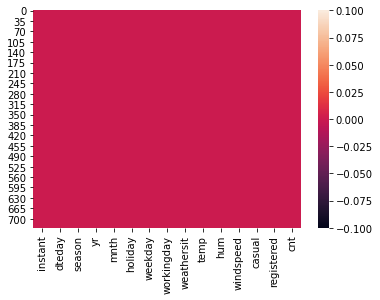

In [5]:
sns.heatmap(bike.isnull())

In [6]:
bike = bike.drop(labels=["instant"], axis=1)

In [7]:
bike = bike.drop(labels=["casual", "registered"], axis=1)

In [8]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [9]:
bike.dteday = pd.to_datetime(bike.dteday, format="%m/%d/%Y")

In [10]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [11]:
bike.index = pd.DatetimeIndex(bike.dteday)

In [12]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


In [13]:
bike = bike.drop(labels=["dteday"], axis=1)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


Text(0, 0.5, 'Bike Rental')

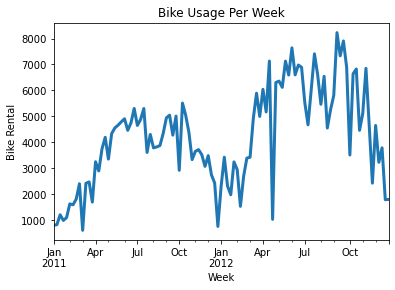

In [14]:
bike['cnt'].asfreq('W').plot(linewidth = 3)
plt.title("Bike Usage Per Week")
plt.xlabel('Week')
plt.ylabel('Bike Rental')

Text(0, 0.5, 'Bike Rental')

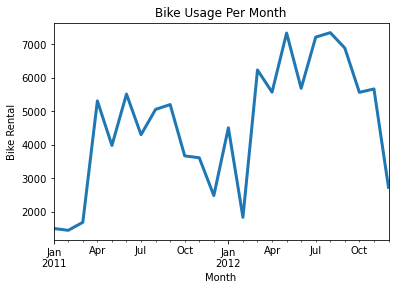

In [15]:
bike['cnt'].asfreq('M').plot(linewidth = 3)
plt.title("Bike Usage Per Month")
plt.xlabel('Month')
plt.ylabel('Bike Rental')

Text(0, 0.5, 'Bike Rental')

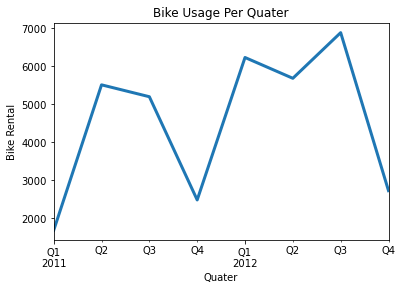

In [16]:
bike['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title("Bike Usage Per Quater")
plt.xlabel('Quater')
plt.ylabel('Bike Rental')

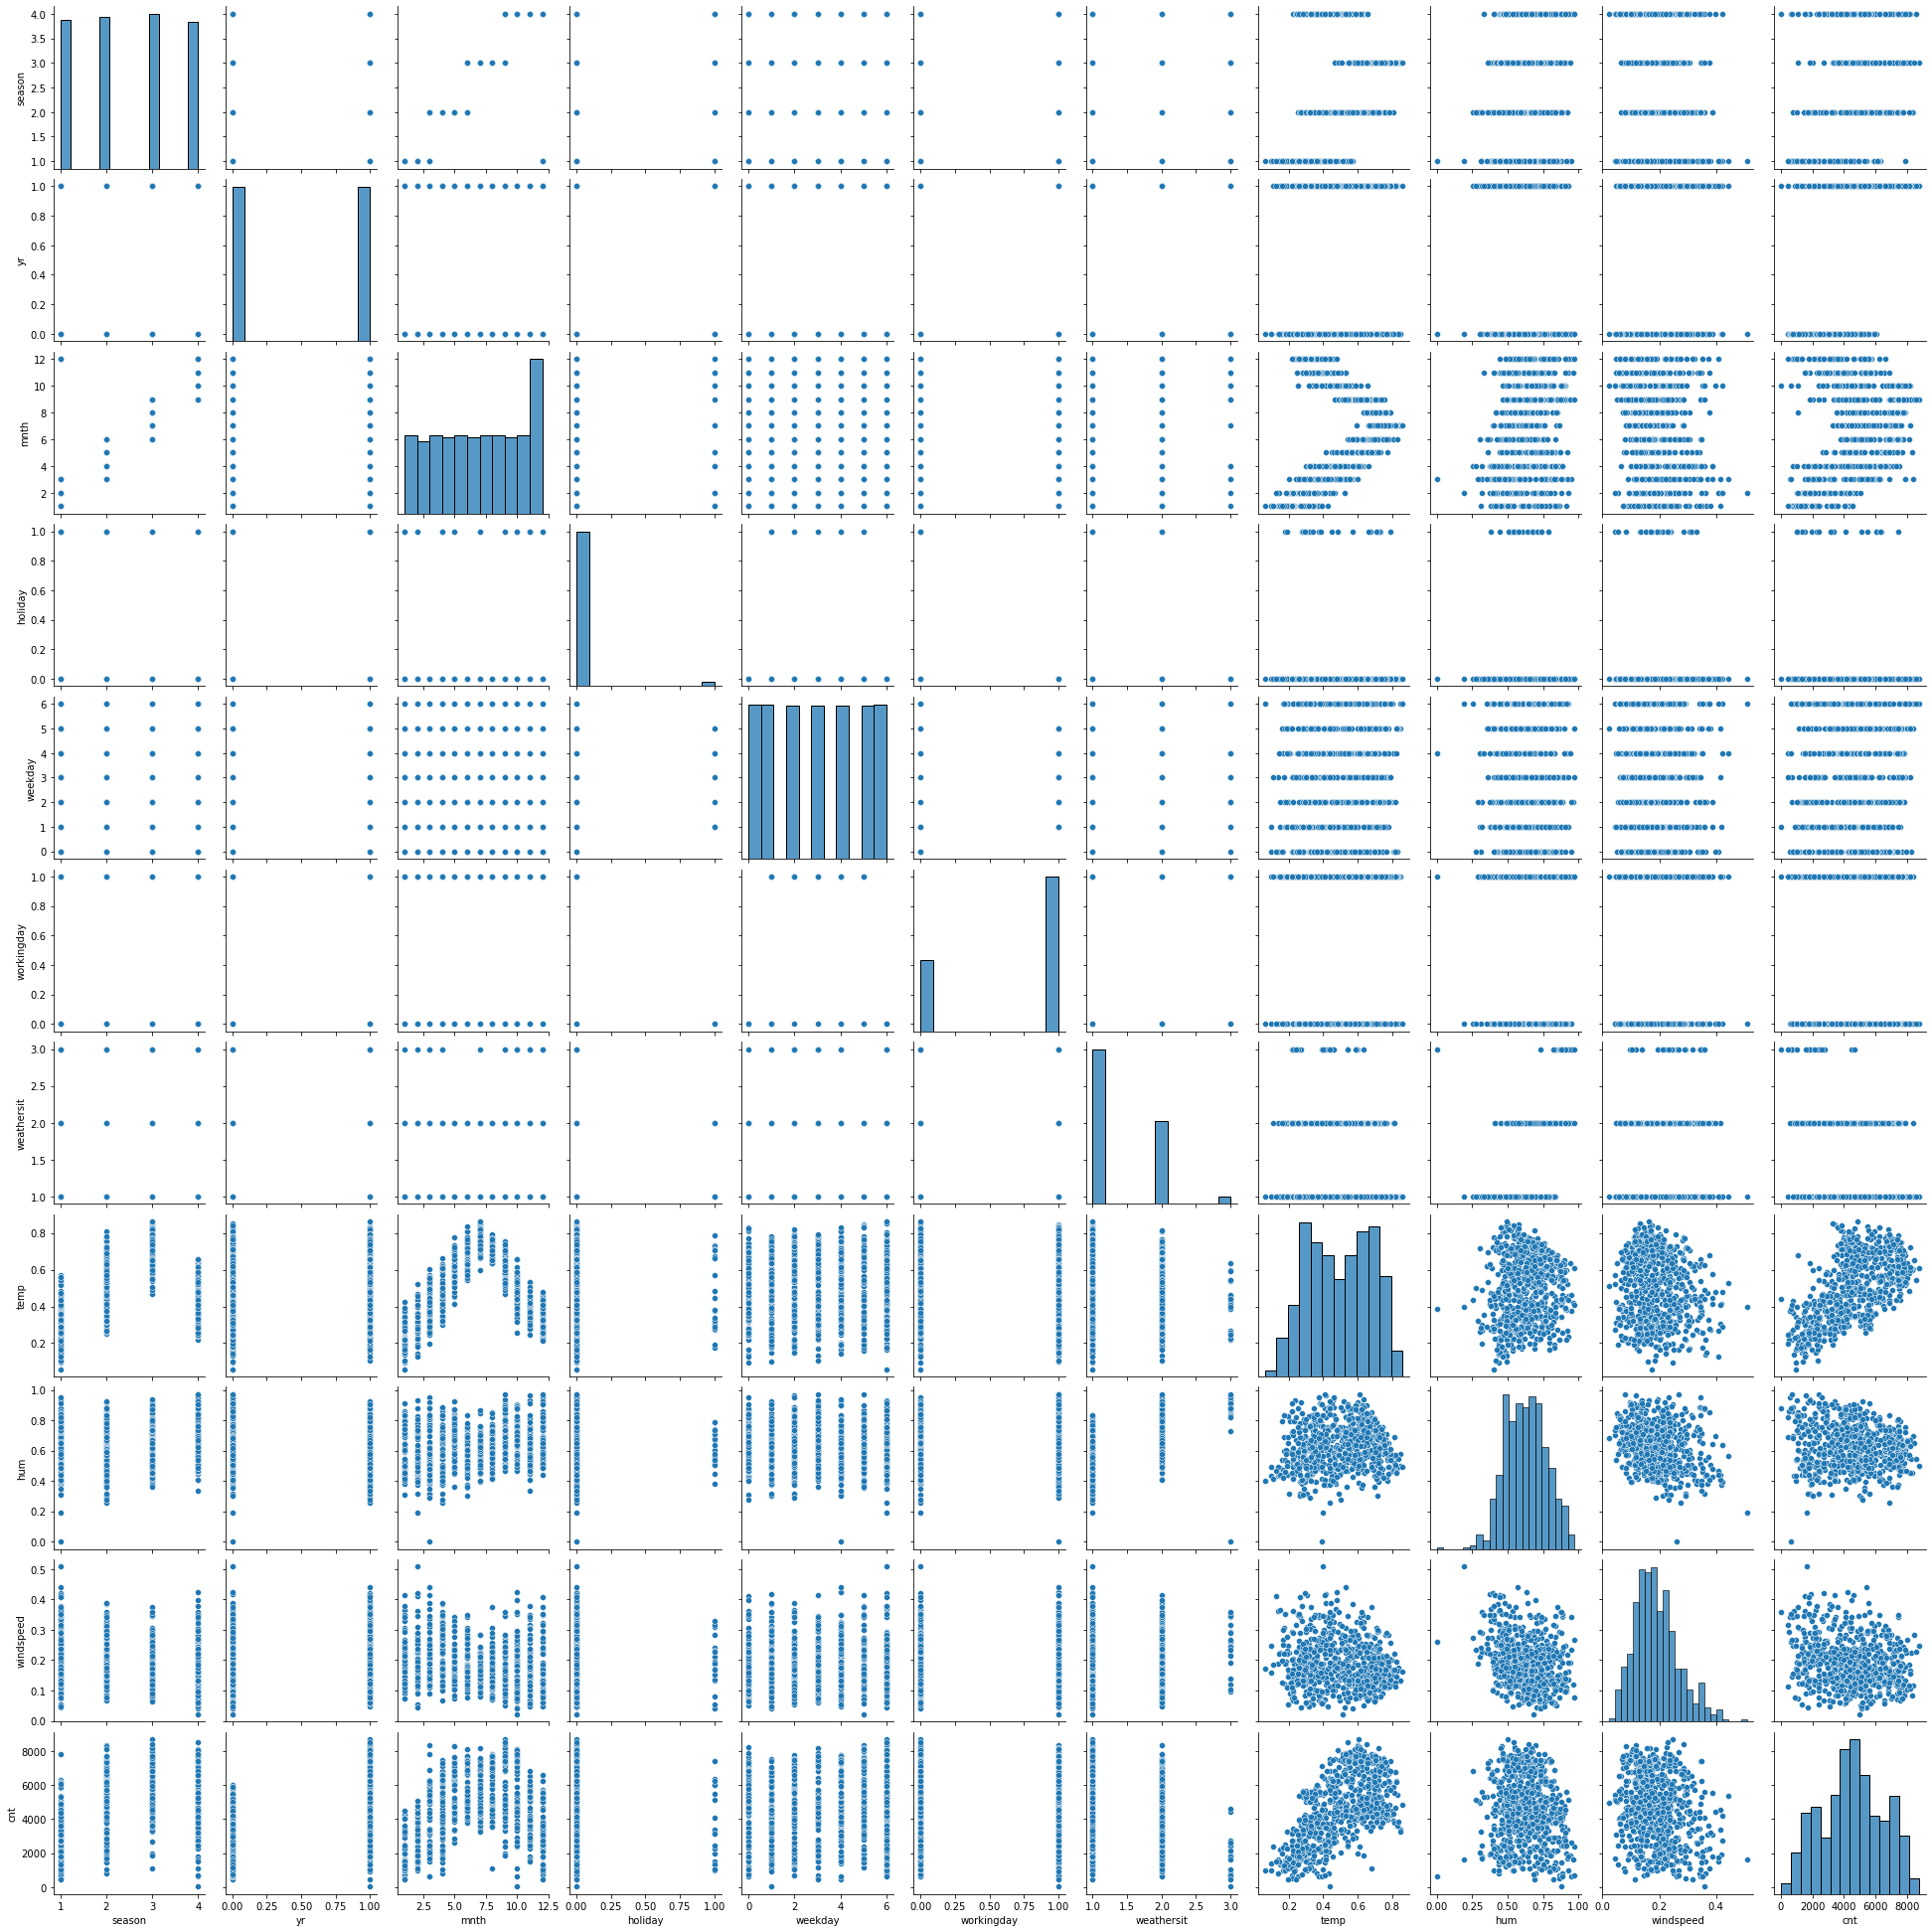

In [17]:
sns.pairplot(bike)

In [18]:
X_numerical = bike[["temp", "hum", "windspeed", "cnt"]]
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


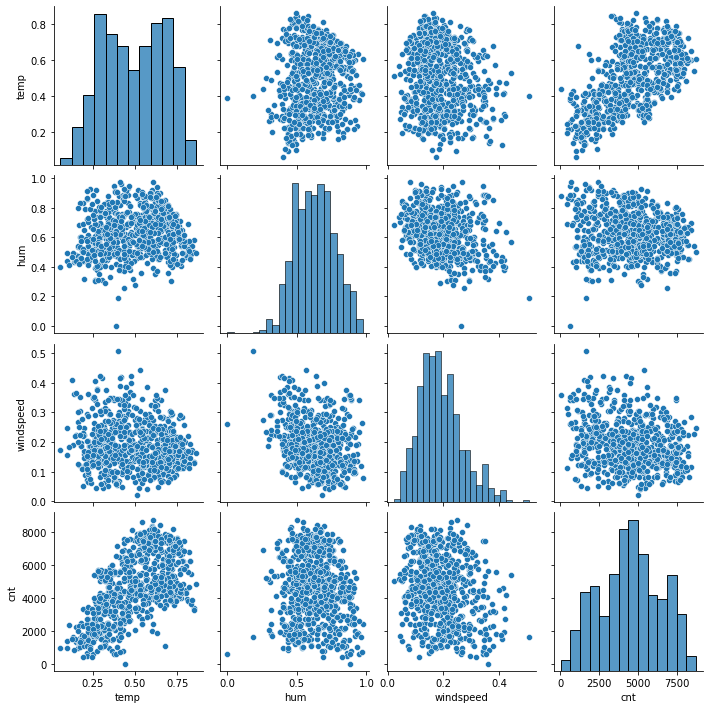

In [19]:
sns.pairplot(X_numerical)

<AxesSubplot:>

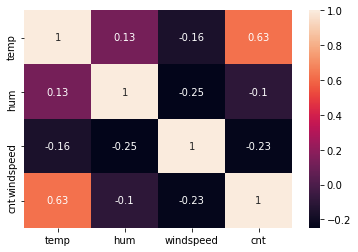

In [20]:
sns.heatmap(X_numerical.corr(), annot=True)

In [21]:
X_cat = bike[["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]]
X_cat

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


In [22]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [23]:
X_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [24]:
X_cat.shape

(731, 32)

In [25]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
X_numerical

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


In [27]:
X_numerical = X_numerical.reset_index()
X_numerical

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...
726,2012-12-27,0.254167,0.652917,0.350133,2114
727,2012-12-28,0.253333,0.590000,0.155471,3095
728,2012-12-29,0.253333,0.752917,0.124383,1341
729,2012-12-30,0.255833,0.483333,0.350754,1796


In [28]:
X_all = pd.concat([X_cat, X_numerical], axis=1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-27,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-28,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2012-12-29,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2012-12-30,0.255833,0.483333,0.350754,1796


In [29]:
X_all = X_all.drop('dteday', axis=1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


In [30]:
X = X_all.iloc[:, :-1].values
X

array([[1.      , 0.      , 0.      , ..., 0.344167, 0.805833, 0.160446],
       [1.      , 0.      , 0.      , ..., 0.363478, 0.696087, 0.248539],
       [1.      , 0.      , 0.      , ..., 0.196364, 0.437273, 0.248309],
       ...,
       [1.      , 0.      , 0.      , ..., 0.253333, 0.752917, 0.124383],
       [1.      , 0.      , 0.      , ..., 0.255833, 0.483333, 0.350754],
       [1.      , 0.      , 0.      , ..., 0.215833, 0.5775  , 0.154846]])

In [31]:
y = X_all.iloc[:, -1:].values
y

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321],
       [1263],
       [1162],
       [1406],
       [1421],
       [1248],
       [1204],
       [1000],
       [ 683],
       [1650],
       [1927],
       [1543],
       [ 981],
       [ 986],
       [1416],
       [1985],
       [ 506],
       [ 431],
       [1167],
       [1098],
       [1096],
       [1501],
       [1360],
       [1526],
       [1550],
       [1708],
       [1005],
       [1623],
       [1712],
       [1530],
       [1605],
       [1538],
       [1746],
       [1472],
       [1589],
       [1913],
       [1815],
       [2115],
       [2475],
       [2927],
       [1635],
       [1812],
       [1107],
       [1450],
       [1917],
       [1807],
       [1461],
       [1969],
       [2402],
       [1446],
       [1851],
       [2134],
       [1685],
       [1944],
       [2077],
       [ 605],
       [1872],
       [21

In [32]:
X.shape

(731, 35)

In [33]:
y.shape

(731, 1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y = scaler.fit_transform(y)
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
X_train.shape

(584, 35)

In [37]:
X_test.shape

(147, 35)

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(
    optimizer='Adam',
    loss='mean_squared_error'
)

In [41]:
epochs_hist = model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=50,
    validation_split=0.2
)

Train on 467 samples, validate on 117 samples
Epoch 1/25
467/467 [==============================] - 1s 3ms/sample - loss: 0.1794 - val_loss: 0.1183
Epoch 2/25
467/467 [==============================] - 0s 167us/sample - loss: 0.0531 - val_loss: 0.0339
Epoch 3/25
467/467 [==============================] - 0s 152us/sample - loss: 0.0284 - val_loss: 0.0234
Epoch 4/25
467/467 [==============================] - 0s 156us/sample - loss: 0.0169 - val_loss: 0.0212
Epoch 5/25
467/467 [==============================] - 0s 163us/sample - loss: 0.0116 - val_loss: 0.0166
Epoch 6/25
467/467 [==============================] - 0s 158us/sample - loss: 0.0104 - val_loss: 0.0166
Epoch 7/25
467/467 [==============================] - 0s 182us/sample - loss: 0.0091 - val_loss: 0.0150
Epoch 8/25
467/467 [==============================] - 0s 206us/sample - loss: 0.0083 - val_loss: 0.0152
Epoch 9/25
467/467 [==============================] - 0s 197us/sample - loss: 0.0076 - val_loss: 0.0144
Epoch 10/25
467/467 

In [42]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training Loss')

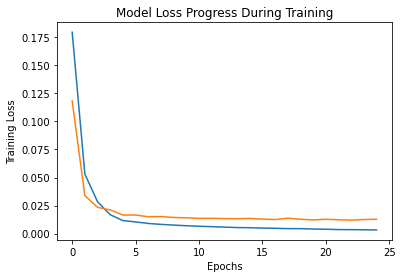

In [43]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")

Text(0, 0.5, 'True Values')

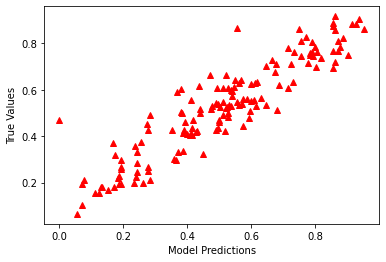

In [44]:
y_predict = model.predict(X_test)

plt.plot(y_test, y_predict, "^", color='r')
plt.xlabel("Model Predictions")
plt.ylabel("True Values")

In [45]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_predict_orig

array([[1602.2577],
       [6690.8564],
       [3556.3909],
       [2350.9604],
       [2511.0337],
       [3653.6191],
       [5286.453 ],
       [4175.0234],
       [4042.1326],
       [6544.2065],
       [5784.861 ],
       [4666.587 ],
       [7497.621 ],
       [4277.238 ],
       [3793.021 ],
       [5497.3145],
       [1710.4089],
       [1737.0338],
       [1580.102 ],
       [6850.6646],
       [6089.861 ],
       [7624.3975],
       [5600.94  ],
       [5913.06  ],
       [4601.427 ],
       [4673.566 ],
       [4492.1587],
       [4869.5625],
       [5328.5156],
       [6665.5522],
       [3717.6038],
       [2923.0781],
       [2280.131 ],
       [6506.4663],
       [4573.929 ],
       [1959.296 ],
       [2847.8467],
       [3714.4011],
       [4720.4424],
       [6844.062 ],
       [2650.0999],
       [2959.5015],
       [7481.522 ],
       [3695.8376],
       [4863.162 ],
       [ 906.658 ],
       [5508.2427],
       [5431.8965],
       [2600.45  ],
       [6366.5757],


In [46]:
y_test_orig = scaler.inverse_transform(y_test)
y_test_orig

array([[1167.],
       [7446.],
       [3620.],
       [2432.],
       [2132.],
       [3744.],
       [4456.],
       [5180.],
       [4363.],
       [7852.],
       [4128.],
       [5634.],
       [6536.],
       [2496.],
       [4334.],
       [5342.],
       [1650.],
       [2302.],
       [1162.],
       [6978.],
       [6998.],
       [7461.],
       [4966.],
       [5870.],
       [4569.],
       [4634.],
       [5923.],
       [5323.],
       [4763.],
       [6398.],
       [3071.],
       [2121.],
       [1685.],
       [6591.],
       [4378.],
       [2115.],
       [3922.],
       [4270.],
       [4326.],
       [7641.],
       [3129.],
       [3392.],
       [7525.],
       [4511.],
       [3606.],
       [ 623.],
       [5382.],
       [5217.],
       [3204.],
       [5810.],
       [3487.],
       [3351.],
       [6824.],
       [1501.],
       [6598.],
       [6904.],
       [4266.],
       [3239.],
       [3613.],
       [4608.],
       [1098.],
       [3429.],
       [

Text(0, 0.5, 'True Values')

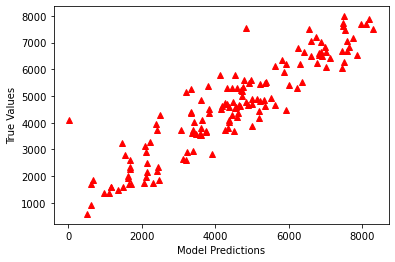

In [47]:
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel("Model Predictions")
plt.ylabel("True Values")

In [48]:
k = X_test.shape[1]
k

35

In [49]:
n = len(X_test)
n

147

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [51]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '0.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n-k-1) 

In [52]:
print("RSME = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)
print("R2 = ", r2)
print("Adjected R2 = ", adj_r2)

RSME =  811.217
MSE =  658072.5377186342
MAE =  594.5185879039116
R2 =  0.8374548410379146
Adjected R2 =  0.7862018629868065
